# Intro to Machine Learning (based on Python Data Science)

## Basic Workflow

In [1]:
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\jmcketney.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


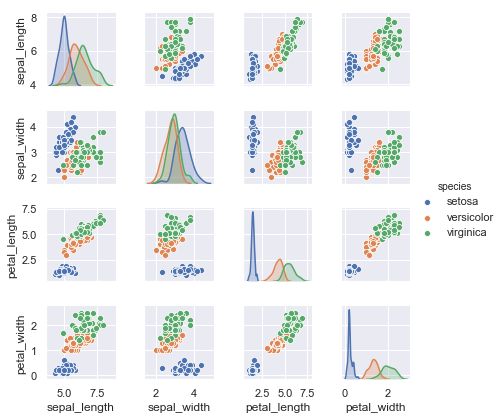

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', height = 1.5)

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

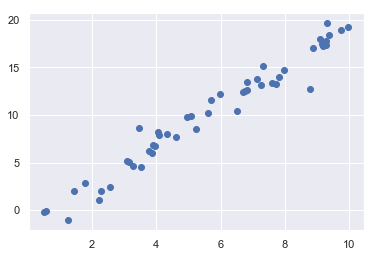

In [8]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(50)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)


In [9]:
rng2 = np.random.RandomState(5)
print(rng2.rand(10))

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


In [10]:
##Testing linear regression needs to be imported from the sklearn.linear_model library
from sklearn.linear_model import LinearRegression

In [11]:
##Defining the the model as linear regression with a fit intercept, a hyperparameter
model= LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X = x[:, np.newaxis]
X.shape


(50, 1)

In [13]:
##Applying our defined model to our x, y data

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
##Model parameters always end with a trailing underscore
model.coef_

array([2.09046825])

In [15]:
model.intercept_

-1.6248514389700013

In [16]:
##New values with which to test the models prediction ability
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

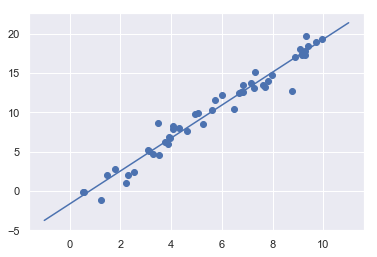

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised example using naive bayes gaussian

In [18]:
##Will valdiate with Naive Bayes because fast and no hyperparameters good for testing conceptual viability
##random state variable is synonmous with the set.seed variable in R
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)


In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to TRAINING data
y_model = model.predict(Xtest)             # 4. Use/test model on different set of data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised example using value decomposition


In [21]:
from sklearn.decomposition import PCA   # 1. choose model class
model = PCA(n_components = 2)           # 2. instantiate model
model.fit(X_iris)                       # 3. fit model to TRAINING data
X_2D = model.transform(X_iris)          # 4. Use/test model on different set of data

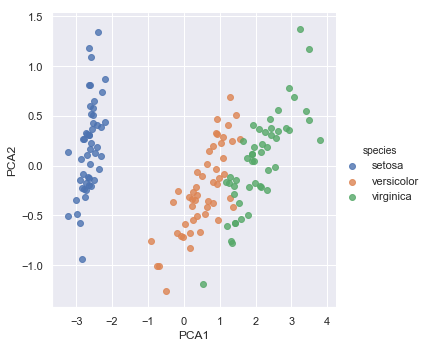

In [22]:
##Plotting the two PCA components generated above
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1","PCA2", hue = 'species', data = iris, fit_reg=False);

In [26]:
##Now trying unsupervised clustering using a Gaussian mixed model

from sklearn.mixture import GaussianMixture                      #Choose model class
model = GaussianMixture(n_components=3, covariance_type = 'full') #Choose hyperparameters and instantiate
model.fit(X_iris)                                                 #Fit to training data
y_gmm = model.predict(X_iris)                                     #Use to predict values for other data  

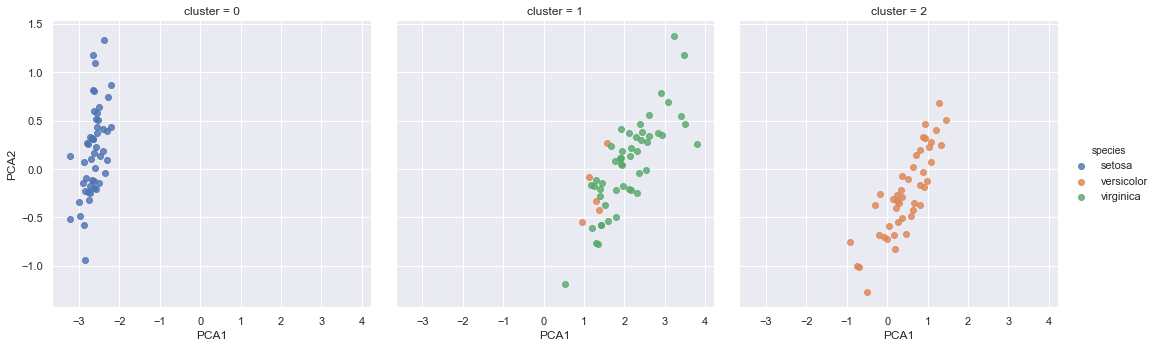

In [27]:
#Plot the model fit data
iris['cluster'] = y_gmm  #Assigns the model prediction output to a variable in iris called cluster
sns.lmplot("PCA1","PCA2", data=iris, hue = 'species', col = 'cluster', fit_reg=False);  #col must be specifying the columns are by cluster

## Cool Application:Handwritten Digits

In [62]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape   ##1797 element array of 8 by 8 pixel boxes

(1797, 8, 8)

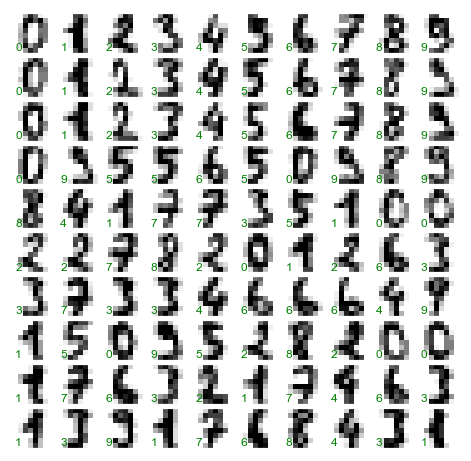

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]}, 
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

### Treat each pixel in image as feature
#### Then flatten out array so we have length-64 array of features

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [72]:
## Lets reduce the data to two dimensions for visualization

from sklearn.manifold import Isomap      #Choose and import the model class
iso = Isomap(n_components=2)             #Instantiate the model with the hyperparameters
iso.fit(digits.data)                     #Fit the model to known/training data
data_projected = iso.transform(digits.data)  #Apply the model to new data
data_projected.shape
colors = np.random.rand(1797)

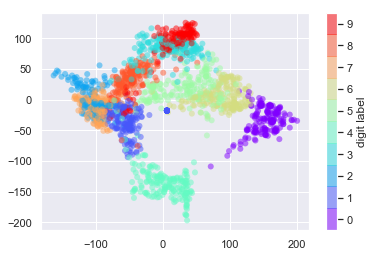

In [85]:
import numpy as np

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,           #x is pca1(all rows,col1), and y is pca2(all rows, col2)
           edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))                            #adds a legend indicating which color relates to which number digit
plt.clim(-0.5,9.5);

In [69]:
#Very confused on why that plot won't color itself correctly

##Figured it out, the problem was that I made the range in my clim too small the colors were limited to -0.5 to 0.5
import collections, numpy

collections.Counter(digits.target)



Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

### Now we will try to classify the handwritten digits

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### Confustion Matrix provides insight on where model went wrong

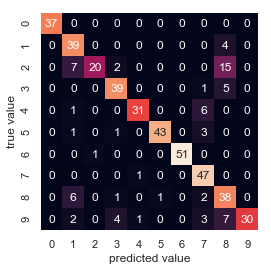

In [77]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');        #like the hardware store ahahahah


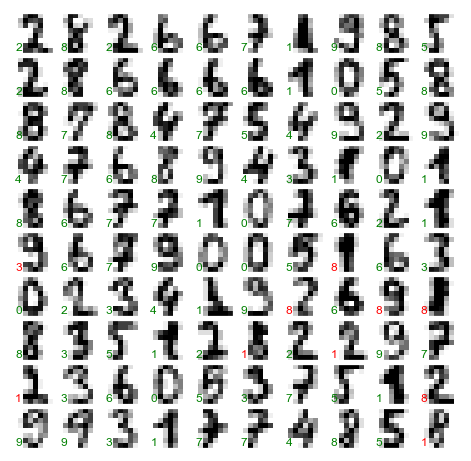

In [80]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

# Hyperparameters and Validation

### Example of incorrect validation strategy

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)     #instantiate model with necessary hyperparameters

In [5]:
model.fit(X, y)                    #Fit  the model to the training data
y_model = model.predict(X)        #predict new data labels from trained model

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)                    #result is a perfect score because trained and evaluated on the same data

1.0

### Need to holdout some data to validate your model

In [8]:
##Lets come back to this one I'd say

from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2_model, y2)

C:\Users\jmcketney.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9066666666666666

#### If wanted to do cross validation on two data sets:

In [9]:
#two fold cross validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [10]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [11]:
#Can do cross validation n-fold where n is the number of samples
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
scores.mean()


0.96

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


In [16]:
import numpy as np
##GOTTA FIGURE OUT WHAT THIS FUNCTION IS DOING
def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)    #instantiate the random state obj
    X = rng.rand(N, 1) ** 2             # makes numpy ndarray
    y = 10 - 1. / (X.ravel() + 0.1)     #makes another ndarray by transposing X
    if err > 0:
        y += err * rng.randn(N)         # adds wobble effect
    return X, y

X, y = make_data(40)


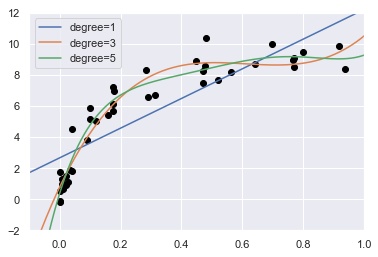

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()      #plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    #Here instantiating, setting model hyperparams, fit, and testing 
    #all in one line
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


Text(0,0.5,'score')

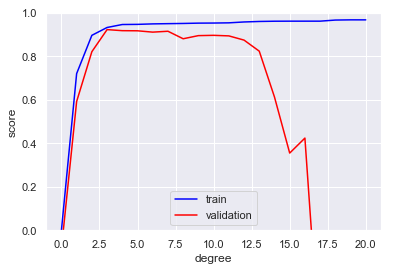

In [18]:
#Time to use the validation curve

from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          'polynomialfeatures__degree',
                                         degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'train')
plt.plot(degree, np.median(val_score, 1), color = 'red', label='validation')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')


(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

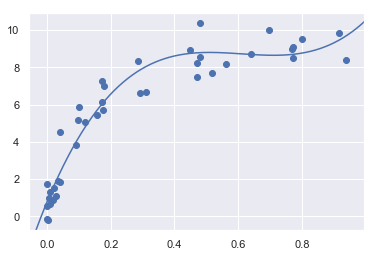

In [19]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

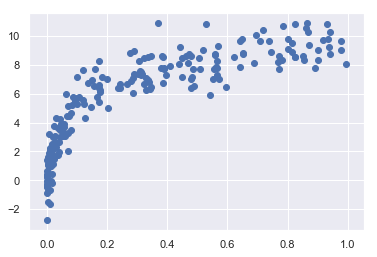

In [20]:
#New much larger dataset
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

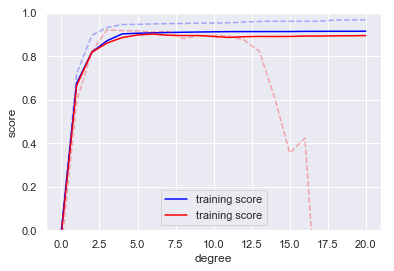

In [21]:
##GOTTA FIGURE OUT THE PROBLEM

degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                            'polynomialfeatures__degree', 
                                            degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='training score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha = 0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha = 0.3, linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

#### Computing Learning Curves

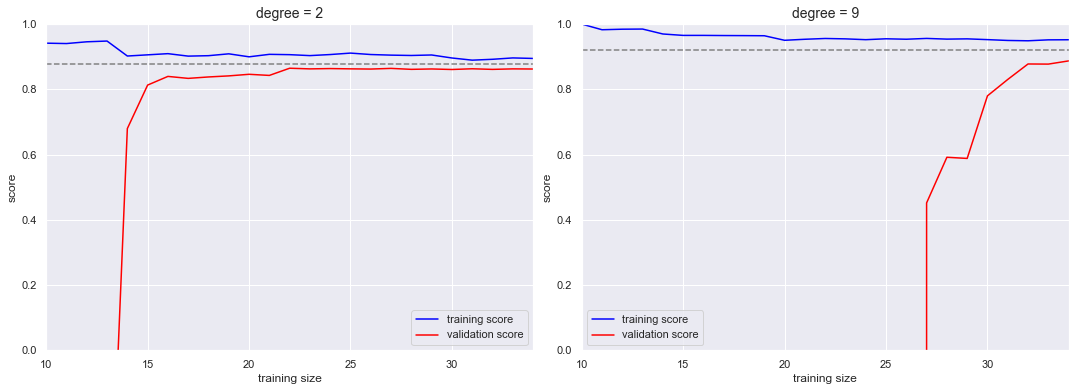

In [22]:
##sklearn.learning curve has been absorbed into package sklearn.model_selection
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
    

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [24]:
#Won't work if we use mine (above)
#Will work if we use one direct from textbook (below)

grid.fit(X,y);

In [25]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

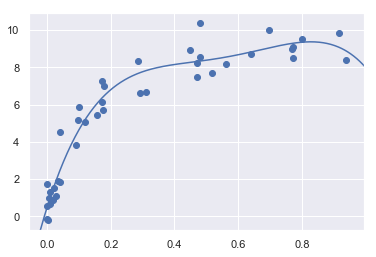

In [26]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# Feature Engineering

### Transforming categorical features

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [3]:
#Could encode as a series of numbers like 1,2,3 but that implies algebraic features in python

from sklearn.feature_extraction import DictVectorizer    #Dict Vectorizer allows one-hot encoding leading to series of expanded
vec = DictVectorizer(sparse=False, dtype=int)             #binary columns, one for potential group
vec.fit_transform(data)     

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

##### Can see above that youturn single neighborhood column into three where just yes or no for association

In [4]:
vec.get_feature_names() #See three columns here. Potentially very large expansion of the dataset

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [5]:
vec = DictVectorizer(sparse=True, dtype=int) #can compact your data by making into sparse matrix since mostly zeros in one-hots
vec.fit_transform(data)
#sklearn.preprocessing.OneHotEncoder
#sklearn.feature_extraction.FeatureHasher
#Two other one-hot tools

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Transforming Text Features

In [6]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()               #Count vectorizer allows automatic conversion multiple strings into vector of word elements
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [9]:
#Result is a sparse matrix with word counts
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names()) #COULD BE USED TO TURN SEQUENCE TO COUNTS

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


#####  Problem arises from words appearing frequently

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer    #allows normalization between appearance in document and specific instance
vec = TfidfVectorizer()                                 #Instantiate function
X = vec.fit_transform(sample)                           #Utilize it
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Deriving Features
#### Sometimes transforming a feature makes it more effective for model fitting (like transforming a polybomial)

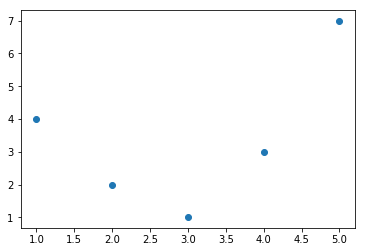

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x,y);


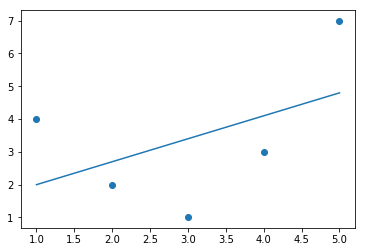

In [14]:
#Badly fit with a straight regression line

from sklearn.linear_model import  LinearRegression
X = x[:, np.newaxis]                                   #Only part I don't get. What is the np.newaxis indicating?
model = LinearRegression().fit(X, y)
yfit =  model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

#### Need a more Complex Model

One thing we can do is make more features from the features we already have

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)  #features added by polynomial transformation
X2 = poly.fit_transform(X)
print(X)
print(X2)  #so now has x, x^2, and x^3 in it
type(X2)
X2.shape

[[1]
 [2]
 [3]
 [4]
 [5]]
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


(5, 3)

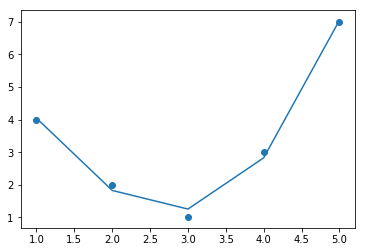

In [19]:
model = LinearRegression().fit(X2, y)  ##If we fit the linear regression to this transformed data set leads to much better fit
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)               ##Talks here about support vector machines which based on lit, might be the way to go

### Imputation (we probably won't use much)

In [20]:
from numpy import nan                ##Dataset with missing values
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [21]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'mean')               #Here instantiate Imputer and tell it that you want it to impute based on mean
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

#### Pipeline allows you to chain many of these operations together

In [22]:
from sklearn.pipeline import make_pipeline
                                                                #Here chain together
model = make_pipeline(Imputer(strategy='mean'),                 #Imputation
                     PolynomialFeatures(degree=2),              #Polynomial transformation
                     LinearRegression())                        #Linear regression fitting

In [25]:
#Can then use this as a standard scikit learn object
model.fit(X, y)  # X with missing values
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# Testing  Ground

In [2]:
import pandas as pd
import sklearn
import sklearn.ensemble

evidence_df = pd.read_csv("NoSingleObsFeatures.csv", low_memory=False)
evidence_df.head()

,Sequence,Charge,Intensity,Length.x,Score,PEP,Total_Observations,CV_Setting,PeptideCharge,Max Intensity CV,...,M.Norm,F.Norm,S.Norm,T.Norm,W.Norm,Y.Norm,V.Norm,U.Norm,O.Norm,P.Norm
0,AAAAAAAAAAAAAAAGAGAGAK,2,548850.0,22,108.560,3.286500e-05,2,CV_25,AAAAAAAAAAAAAAAGAGAGAK_2,25,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0,0.000000
1,AAAAAAAAAAAAAAAGAGAGAK,3,7280200.0,22,137.730,2.498600e-26,4,CV_45,AAAAAAAAAAAAAAAGAGAGAK_3,45,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0,0.000000
2,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,4,12120000.0,52,35.226,1.695400e-06,7,CV_35,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,35,...,0.0,0.0,0.057692,0.057692,0.0,0.0,0.057692,0,0,0.076923
3,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,5,14383000.0,52,39.992,4.956100e-09,4,CV_40,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,40,...,0.0,0.0,0.057692,0.057692,0.0,0.0,0.057692,0,0,0.076923
4,AAAAAAAAAVSR,2,14281000.0,12,77.379,7.435700e-03,7,CV_60,AAAAAAAAAVSR_2,60,...,0.0,0.0,0.083333,0.000000,0.0,0.0,0.083333,0,0,0.000000


In [80]:
#Small subset of sequences to mess around with

workingEvidence_df = evidence_df[['Sequence', 'Max Intensity CV', 'Length.x']][1:5]
print(workingEvidence_df)

truncEvidence_df = evidence_df[['Sequence', 'Max Intensity CV', 'Length.x']]

                                            Sequence  Max Intensity CV  \
1                             AAAAAAAAAAAAAAAGAGAGAK                45   
2  AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...                35   
3  AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...                40   
4                                       AAAAAAAAAVSR                60   

   Length.x  
1        22  
2        52  
3        52  
4        12  


 ## One-hot Encoding

In [10]:
#Keep this around as a guide because I know that it works

from numpy import array
from numpy import argmax                   #finds the index of the maximum value in a vector
from keras.utils import to_categorical
#Make two peptides with which to test that are different lengths
testpep1 = workingEvidence_df['Sequence'][1]
testpep2 = workingEvidence_df['Sequence'][2]
print(testpep1)

#TURNING CHARACTERS INTO INTEGERS
#Define what residues are possible
aminoAcids = 'ACDEFGHIKLMNPQRSTVWY '

# Map character keys to integer values in a dictionary, then map integer keys to character values to revers transform
char_to_int = dict((c, i) for i, c in enumerate(aminoAcids))   #character keys to integer values
int_to_char = dict((i, c) for i, c in enumerate(aminoAcids))   #integer keys to character values

#integer encode the data, turning both peptide sequences into integer vectors
integer_encoded1 = [char_to_int[char] for char in testpep1]
integer_encoded2 = [char_to_int[char] for char in testpep2]
print(integer_encoded1)
print(testpep2)
print(integer_encoded2)

#MANUAL ONE-HOT ENCODING ITERATIVELY (TURNING INTEGER VECTOR INTO VECTOR LIST)
##onehot_encoded1 = list()
##for value in integer_encoded1:
##    letter = [0 for _ in range(len(aminoAcids))]   #make a vector of 0s that is as long as my aminoAcid vocab
##    letter[value] = 1                              #put 1 at index of integer encoding
##    onehot_encoded1.append(letter)                 #add this vector to the list of vectors
##print(onehot_encoded1)
##
####invert encoding by turning a vector from the vector list back into a letter resideue
##inverted = int_to_char[argmax(onehot_encoded1[17])]
##print(inverted)


#If all possibilities are observed than you can simply use to_categorical but because there are other values
# we have to use to_categorical(num_classes=4)

#ONE HOT ENCODING USING KERAS (TURNING INTEGER VECTOR INTO NUMPY ARRAY)
#Important distinction that keras generates a numpy array instead of a list
#data = [1,3,2,0,3,2,2,1,0,1]
#data = array(data)
#print(data)
print("KERAS TIME!!!")
print(integer_encoded1)

#turns integer vector into list of vectors with single 1 in 
encoded2 = to_categorical(integer_encoded2, num_classes=20)
encoded1 = to_categorical(integer_encoded1, num_classes=20)
print(encoded2)

#invert encoding, by finding index of the single 1 in that array dimension
inverted = argmax(encoded2[0])
print(inverted)

#transform back into aa residue using the reverse transformation dictionary

residue = int_to_char[inverted]
print(residue)


AAAAAAAAAAAAAAAGAGAGAK
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 8]
AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGER
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 5, 16, 3, 0, 5, 12, 5, 16, 0, 5, 5, 15, 3, 11, 5, 15, 3, 17, 0, 0, 13, 12, 0, 5, 9, 15, 5, 12, 0, 3, 17, 5, 12, 5, 0, 17, 5, 3, 14]
KERAS TIME!!!
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 8]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0
A


#### In order to use scikit learns' built in one-hot encoder all categories need to be observed at some point in your data

but the Keras package can be used to one-hot encode a series of integers without an ordinal relationship

In [73]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

mymaxlength = encoded2.shape[0]
encoded2.shape
flatencode2 = encoded2.flatten()
flatencode1 = encoded1.flatten()

sequences = [
[1, 2, 3, 4],
  [1, 2, 3],
    [1]
]


numzeros = len(flatencode2) - len(flatencode1)
flatencode1 = np.append(flatencode1, [[0] * numzeros])
#padded1 = pad_sequences(flatencode1, maxlen= len(flatencode2), padding='post')

flatencode1.shape
#print(mymaxlength)
#type(sequences)
newmatrix = np.stack((flatencode1, flatencode2))
newmatrix = np.vstack([newmatrix, flatencode2])
newmatrix.shape

(3, 1040)

In [ ]:
from numpy import array
from numpy import argmax                   #finds the index of the maximum value in a vector
from keras.utils import to_categorical

#Start by finding the max and calculating needed vector length
VEC_LENGTH = max(truncEvidence_df['Length.x']) * 20

#Define what residues are possible
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY ' 

#TURNING CHARACTERS INTO INTEGERS
# Map character keys to integer values in a dictionary, then map integer keys to character values to revers transform
char_to_int = dict((c, i) for i, c in enumerate(aminoAcids))   #character keys to integer values
int_to_char = dict((i, c) for i, c in enumerate(aminoAcids))   #integer keys to character values


#Run full one-hot pipeline for first two to create array foundation
pep1 = truncEvidence_df['Sequence'][1]
pep2 = truncEvidence_df['Sequence'][2]

integer_encoded1 = [char_to_int[char] for char in pep1]
integer_encoded2 = [char_to_int[char] for char in pep2]

encoded2 = to_categorical(integer_encoded2, num_classes=20)
encoded1 = to_categorical(integer_encoded1, num_classes=20)

flatencode2 = encoded2.flatten()
flatencode1 = encoded1.flatten()


numzeros1 = VEC_LENGTH - len(flatencode1)
flatencode1 = np.append(flatencode1, [[0] * numzeros1])

numzeros2 = VEC_LENGTH - len(flatencode1)
flatencode2 = np.append(flatencode1, [[0] * numzeros2])


newmatrix = np.stack((flatencode1, flatencode2))

print(VEC_LENGTH)
newmatrix.shape

#Build out the rest of the sequences' one-hot arrays

nrows = truncEvidence_df.shape[0]

for i in range(3, nrows + 1):
    
    pep = truncEvidence_df['Sequence'][i]
    integer_encode = [char_to_int[char] for char in pep]
    encoded = to_categorical(integer_encode, num_classes=20)
    flatencode = encoded.flatten()
    
    numzeros = VEC_LENGTH - len(flatencode)
    flatencode = np.append(flatencode, [[0] * numzeros])
    
    newmatrix = np.vstack([newmatrix, flatencode])



newmatrix.shape



1100


In [89]:
mynumber = 10

for i in range(1,4):
    print(i)
    mynumber += i

print(mynumber)

1
2
3
16


### Messing around with pyteomics

In [10]:
from pyteomics import mass
from pyteomics import parser

ps = parser.parse(workingEvidence_df['Sequence'][1], show_unmodified_termini=True)
print(ps)
mass.calculate_mass(parsed_sequence=ps)

#lets try to add that mass to the end of the working evidence frame
for seq in 
workingEvidence_df['Mass'] = mass.calculate_mass(parsed_sequence = parser.parse(workingEvidence_df['Sequence'], show_unmodified_termini=True))

['H-', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'A', 'G', 'A', 'K', '-OH']


PyteomicsError: Pyteomics error, message: 'Not a valid modX sequence: 1                               AAAAAAAAAAAAAAAGAGAGAK\n2    AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...\n3    AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...\n4                                         AAAAAAAAAVSR\nName: Sequence, dtype: object'